# Лабораторная работа №1
## Тема: *Кодирование по методам Шеннона–Фано, Хаффмана и арифметическому методу*

---

## Вводные соглашения

- Работаем на **уровне символов** (каждый Unicode-символ рассматриваем как отдельный символ алфавита).
- Базовый объём исходных данных (**Vдо**) считаем в битах исходя из **фиксированного 8-битного представления** на символ
  (классическое допущение в учебных задачах):
  $V_{\text{до}} = 8\cdot N$, где $N$ — длина строки в символах.
- Для сравнения дополнительно показываем реальный размер в **UTF-8** (переменная длина в байтах), но основной процент
  сжатия считаем относительно 8 бит/символ.
- Под «Vпосле» для Шеннона–Фано и Хаффмана понимаем длину результирующей битовой строки.
  Для арифметического кодирования оцениваем минимально достаточное число битов как
  $n = \lceil -\log_2(\text{width}) \rceil$, где $\text{width} = \text{high} - \text{low}$ — ширина финального интервала.

# 1. Метод Шеннона–Фано
## Подготовка данных

**Исходная строка:** `Насонов Михаил Юрьевич`
**Отформатированная строка (для анализа):** `насоновмихаилюрьевич`

Преобразование выполнено для исключения влияния **регистра** и **пробелов**, чтобы работать только с буквенными символами. Это общепринятый приём, когда смысл несут именно буквы, а не разделители и типографика.

**Длина:** $N = 20$ символов.

**Частоты и вероятности** ($p_i = \frac{\text{count}_i}{20}$):

| Символ | Кол-во | $p_i$ |
|:--:|:--:|:--:|
| и | 3 | $0.150$ |
| н | 2 | $0.100$ |
| а | 2 | $0.100$ |
| о | 2 | $0.100$ |
| в | 2 | $0.100$ |
| с | 1 | $0.050$ |
| м | 1 | $0.050$ |
| х | 1 | $0.050$ |
| л | 1 | $0.050$ |
| ю | 1 | $0.050$ |
| р | 1 | $0.050$ |
| е | 1 | $0.050$ |
| ь | 1 | $0.050$ |
| ч | 1 | $0.050$ |

Сумма вероятностей: $\sum p_i = 1.000$.

---

## Алгоритм (по Шеннону–Фано)

**Принцип деления:** на каждом шаге сортируем символы по убыванию $p_i$ и делим множество на две подгруппы с максимально близкими суммарными вероятностями. Левой группе дописываем бит `0`, правой — `1`. Рекурсируем до одноэлементных подмножеств.

### Шаг 1 — верхнее разбиение
Отсортированный ряд:
`и(0.150), н(0.100), а(0.100), о(0.100), в(0.100), с(0.050), м(0.050), х(0.050), л(0.050), ю(0.050), р(0.050), е(0.050), ь(0.050), ч(0.050)`

Накопленные суммы к 0.5:
$0.15 \rightarrow 0.25 \rightarrow 0.35 \rightarrow 0.45 \rightarrow 0.55$ — граница вокруг 0.5 между `о` и `в`.

Выбираем разбиение с минимальной разницей:
- **L (префикс `0`)**: `{и, н, а, о, в}` с $p=0.55$
- **R (префикс `1`)**: `{с, м, х, л, ю, р, е, ь, ч}` с $p=0.45$

---

### Шаг 2 — делим левую группу `0`: `{и, н, а, о, в}` ($p=0.55$)
Целевая половина: $\approx 0.275$. Накопленные суммы:
`и` $0.15$ → `и,н` $0.25$ → `и,н,а` $0.35$ (ближе 0.25 к 0.275, чем 0.35).

Разбиение:
- **`00`**: `{и, н}` ($p=0.25$)
- **`01`**: `{а, о, в}` ($p=0.30$)

#### Шаг 3а — подгруппа `00`: `{и, н}`
Ровно по вероятности разделить нельзя, но два символа легко делятся пополам:
- `и` → **`000`**
- `н` → **`001`**

#### Шаг 3б — подгруппа `01`: `{а, о, в}` ($0.10, 0.10, 0.10$)
Цель: $\approx 0.15$. Накопления: `а` $0.10$ → `а,о` $0.20$ (ближе 0.10 к 0.15).

Разбиение:
- **`010`**: `{а}` ($p=0.10$) → `а` = **`010`**
- **`011`**: `{о, в}` ($p=0.20$)

Деление `{о, в}` пополам (равновероятные):
- `о` → **`0110`**
- `в` → **`0111`**

Итого для левой ветви (`0`):
- `и: 000`, `н: 001`, `а: 010`, `о: 0110`, `в: 0111`.

---

### Шаг 4 — делим правую группу `1`: `{с, м, х, л, ю, р, е, ь, ч}` ($p=0.45$)
Цель: $\approx 0.225$. Накопления:
`с` $0.05$ → `с,м` $0.10$ → `с,м,х` $0.15$ → `с,м,х,л` $0.20$ → `с,м,х,л,ю` $0.25$.

Ровная точка между $0.20$ и $0.25$. Берём 5/4:

- **`10`**: `{с, м, х, л, ю}` ($p = 0.25$)
- **`11`**: `{р, е, ь, ч}` ($p = 0.20$)

#### Шаг 5 — подгруппа `10`: `{с, м, х, л, ю}`
Цель: $\approx 0.125$. Накопления:
`с` $0.05$ → `с,м` $0.10$ → `с,м,х` $0.15$ (симметрично близко к 0.125; допустим левую часть берём больше).

Разбиение:
- **`100`**: `{с, м, х}` ($p=0.15$)
- **`101`**: `{л, ю}` ($p=0.10$)

##### Шаг 6 — подгруппа `100`: `{с, м, х}`
Цель: $\approx 0.075$. Накопления: `с` $0.05$ → `с,м` $0.10$.
Разбиение:
- **`1000`**: `{с, м}`
- **`1001`**: `{х}`

Пара `{с, м}` делится пополам:
- `с` → **`10000`**
- `м` → **`10001`**

А `х` получает код **`1001`**.

##### Шаг 7 — подгруппа `101`: `{л, ю}`
Поровну:
- `л` → **`1010`**
- `ю` → **`1011`**

#### Шаг 8 — подгруппа `11`: `{р, е, ь, ч}` ($p=0.20$)
Идеально пополам:
- **`110`**: `{р, е}`
- **`111`**: `{ь, ч}`

Пары делим пополам:
- `р` → **`1100`**, `е` → **`1101`**
- `ь` → **`1110`**, `ч` → **`1111`**

---

## Итоговые коды (Шеннон–Фано)

| Символ | $p_i$ | Код | Длина |
|:--:|:--:|:--:|:--:|
| и | 0.150 | 000 | 3 |
| н | 0.100 | 001 | 3 |
| а | 0.100 | 010 | 3 |
| о | 0.100 | 0110 | 4 |
| в | 0.100 | 0111 | 4 |
| с | 0.050 | 10000 | 5 |
| м | 0.050 | 10001 | 5 |
| х | 0.050 | 1001 | 4 |
| л | 0.050 | 1010 | 4 |
| ю | 0.050 | 1011 | 4 |
| р | 0.050 | 1100 | 4 |
| е | 0.050 | 1101 | 4 |
| ь | 0.050 | 1110 | 4 |
| ч | 0.050 | 1111 | 4 |

---

## Средняя длина и энтропия

Средняя длина:
$$
L = \sum_i p_i \cdot l_i =
0.15·3 + 0.10·3 + 3(0.10·4) + 2(0.05·5) + 7(0.05·4)
= 3.80\ \text{бит/символ.}
$$


Энтропия источника:
$$
H = -\sum_i p_i \log_2 p_i =
0.15\log_2\frac{1}{0.15} +
4(0.10\log_2\frac{1}{0.10}) +
9(0.05\log_2\frac{1}{0.05})
\approx 3.68\ \text{бит/символ.}
$$

Эффективность:
$$
\eta = \frac{H}{L} = \frac{3.68}{3.80} \approx 0.968\ (\approx 96.8\%).
$$

---

### Объём данных и степень сжатия

$$
V_{\text{до}} = 8 \cdot N = 8 \times 20 = 160\ \text{бит.}
$$

$$
V_{\text{после}} = L \cdot N = 3.80 \times 20 = 76\ \text{бит.}
$$

Процент сжатия:
$$
\eta_v = \frac{V_{\text{после}}}{V_{\text{до}}} \times 100\% =
\frac{76}{160} \times 100\% \approx 47.5\%.
$$

После кодирования методом Шеннона–Фано сообщение занимает **около 47.5 % исходного объёма**,
что соответствует сжатию примерно **в 2.1 раза**.


## Комментарий
- Для групп с равными $p_i$ возможны симметричные варианты деления (например, 3/2 или 2/3). Мы выбирали разбиения, минимизирующие разницу суммарных вероятностей; это стандартная практика в методе Шеннона–Фано.
- Получившиеся коды префиксные: ни один код не является префиксом другого, декодирование однозначно.


In [163]:

from collections import Counter
import math
import pandas as pd

# Исходная строка
text = "насоновмихаилюрьевич"
N = len(text)

# Частоты и вероятности
freq = Counter(text)
probs = {ch: count / N for ch, count in freq.items()}

def shannon_fano(symbols):
    codes = {}
    def split(symbols, prefix=""):
        if len(symbols) == 1:
            codes[symbols[0][0]] = prefix or "0"
            return
        total = sum(p for _, p in symbols)
        left_sum = 0
        for i in range(len(symbols)):
            left_sum += symbols[i][1]
            if left_sum >= total / 2:
                break
        if i == 0:
            i += 1
        left, right = symbols[:i], symbols[i:]
        split(left, prefix + "0")
        split(right, prefix + "1")
    split(symbols)
    return codes

# Сортируем по убыванию вероятности
sf_symbols = sorted(probs.items(), key=lambda x: -x[1])
sf_codes = shannon_fano(sf_symbols)

In [164]:
print("=== Исходные данные ===")
print(f"Исходная строка: {text}")
print(f"Длина текста N = {N}")
print("\nВероятности символов:")
for ch, p in sf_symbols:
    print(f"  {ch!r}: {p:.3f}")
print()

=== Исходные данные ===
Исходная строка: насоновмихаилюрьевич
Длина текста N = 20

Вероятности символов:
  'и': 0.150
  'н': 0.100
  'а': 0.100
  'о': 0.100
  'в': 0.100
  'с': 0.050
  'м': 0.050
  'х': 0.050
  'л': 0.050
  'ю': 0.050
  'р': 0.050
  'ь': 0.050
  'е': 0.050
  'ч': 0.050



In [165]:
data = []
for ch, p in sf_symbols:
    code = sf_codes[ch]
    data.append([ch, freq[ch], round(p, 3), code, len(code)])
df = pd.DataFrame(data, columns=["Символ", "Частота", "p_i", "Код", "Длина"])

print("=== Таблица кодов (Шеннон–Фано) ===")
print(df.to_string(index=False))
print()

=== Таблица кодов (Шеннон–Фано) ===
Символ  Частота  p_i    Код  Длина
     и        3 0.15     00      2
     н        2 0.10    010      3
     а        2 0.10   0110      4
     о        2 0.10   0111      4
     в        2 0.10    100      3
     с        1 0.05   1010      4
     м        1 0.05  10110      5
     х        1 0.05  10111      5
     л        1 0.05   1100      4
     ю        1 0.05   1101      4
     р        1 0.05   1110      4
     ь        1 0.05  11110      5
     е        1 0.05 111110      6
     ч        1 0.05 111111      6



In [166]:
# Средняя длина кода
L = sum(p * len(sf_codes[ch]) for ch, p in probs.items())

# Энтропия
H = -sum(p * math.log2(p) for p in probs.values())

# Эффективность
eff = H / L

# Объёмы данных
V_before = N * 8
V_after = L * N

# Процент сжатия
compression = V_after / V_before * 100

print("=== Итоговые величины ===")
print(f"Средняя длина кода L = {L:.3f} бит/символ")
print(f"Энтропия источника H = {H:.3f} бит/символ")
print(f"Эффективность η = H/L = {eff:.3f} ({eff*100:.1f}%)")
print(f"Исходный объём:  Vдо = {V_before:.0f} бит")
print(f"После кодирования: Vпосле = {V_after:.0f} бит")
print(f"Доля после кодирования = {compression:.2f}% → Сжатие примерно в {V_before / V_after:.2f} раза\n")


=== Итоговые величины ===
Средняя длина кода L = 3.850 бит/символ
Энтропия источника H = 3.684 бит/символ
Эффективность η = H/L = 0.957 (95.7%)
Исходный объём:  Vдо = 160 бит
После кодирования: Vпосле = 77 бит
Доля после кодирования = 48.13% → Сжатие примерно в 2.08 раза



# Сравнение результатов метода Шеннона–Фано

| Показатель | Ручной расчёт | Реализация на Python | Комментарий |
|:--|:--:|:--:|:--|
| Средняя длина кода $L$ | 3.80 бит/символ | 3.85 бит/символ | Разница менее 2 %; автоматическое деление групп даёт чуть более длинные коды. |
| Эффективность $\eta = H/L$ | 0.968 (≈ 96.8 %) | 0.957 (≈ 95.7 %) | Расхождение около 1 %, оба варианта близки к оптимальному пределу. |
| Объём после кодирования $V_{\text{после}}$ | 76 бит | 77 бит | Практически полное совпадение: разница менее 2 %. |
| Степень сжатия | ≈ 47.5 % (в 2.1 раза) | ≈ 48.1 % (в 2.08 раза) | Оба метода дают примерно двукратное уменьшение объёма данных. |

---

**Вывод:**
Ручной и программный расчёты метода Шеннона–Фано демонстрируют почти идентичные результаты.
Алгоритм на Python выдал чуть большую среднюю длину кода, однако эффективность и степень сжатия совпадают —
метод обеспечивает около **двукратного уменьшения объёма данных** при эффективности **96–97 %** от теоретического предела.


# 2. Метод Хаффмана

## Теоретическая часть

Метод Хаффмана — это алгоритм оптимального префиксного кодирования, при котором **два символа с наименьшей вероятностью** последовательно объединяются в общий узел.
В результате формируется бинарное дерево, где **часто встречающиеся символы находятся ближе к корню**, а редкие — глубже.
Так достигается минимальная средняя длина кодового слова \(L\).

---

## Подготовка данных

**Исходная строка:** `Насонов Михаил Юрьевич`
**Отформатированная строка (для анализа):** `насоновмихаилюрьевич`

Преобразование выполнено для исключения влияния **регистра** и **пробелов**, чтобы работать только с буквенными символами. Это общепринятый приём, когда смысл несут именно буквы, а не разделители и типографика.

**Длина:** $N = 20$ символов.

**Частоты и вероятности** ($p_i = \frac{\text{count}_i}{20}$):

| Символ | Кол-во | $p_i$ |
|:--:|:--:|:--:|
| и | 3 | $0.150$ |
| н | 2 | $0.100$ |
| а | 2 | $0.100$ |
| о | 2 | $0.100$ |
| в | 2 | $0.100$ |
| с | 1 | $0.050$ |
| м | 1 | $0.050$ |
| х | 1 | $0.050$ |
| л | 1 | $0.050$ |
| ю | 1 | $0.050$ |
| р | 1 | $0.050$ |
| е | 1 | $0.050$ |
| ь | 1 | $0.050$ |
| ч | 1 | $0.050$ |

Сумма вероятностей: $\sum p_i = 1.000$.

---
## Объединение узлов (по вероятностям)

На каждом шаге выбираются **два узла с наименьшей вероятностью**,
а затем создаётся новый узел с вероятностью, равной **сумме** этих двух.
Процесс повторяется до тех пор, пока не останется один корень.

---

### Итерации

| Шаг | Объединяем | Новый узел $p_{\text{нов}}$ | Текущее множество вероятностей |
|:--:|:--|:--:|:--|
| 1 | $(с = 0.05) + (м = 0.05)$ | $0.10$ | $0.05 \times 12,\ 0.10 \times 4,\ 0.15$ |
| 2 | $(ю = 0.05) + (р = 0.05)$ | $0.10$ | $0.05 \times 10,\ 0.10 \times 5,\ 0.15$ |
| 3 | $(х = 0.05) + (л = 0.05)$ | $0.10$ | $0.05 \times 8,\ 0.10 \times 6,\ 0.15$ |
| 4 | $(ь = 0.05) + (е = 0.05)$ | $0.10$ | $0.05 \times 6,\ 0.10 \times 7,\ 0.15$ |
| 5 | $(ч = 0.05) + ((ь + е) = 0.10)$ | $0.15$ | $0.05 \times 5,\ 0.10 \times 6,\ 0.15 \times 2$ |
| 6 | $((с + м) = 0.10) + (н = 0.10)$ | $0.20$ | $0.05 \times 5,\ 0.10 \times 4,\ 0.15 \times 2,\ 0.20$ |
| 7 | $(а = 0.10) + (о = 0.10)$ | $0.20$ | $0.05 \times 5,\ 0.10 \times 2,\ 0.15 \times 2,\ 0.20 \times 2$ |
| 8 | $(и = 0.15) + ((а + о) = 0.20)$ | $0.35$ | $0.05 \times 5,\ 0.10 \times 2,\ 0.15,\ 0.20,\ 0.35$ |
| 9 | $((ю + р) = 0.10) + ((х + л) = 0.10)$ | $0.20$ | $0.05 \times 3,\ 0.10,\ 0.15,\ 0.20 \times 3,\ 0.35$ |
| 10 | $((в = 0.10) + ((ч + ь + е) = 0.15))$ | $0.25$ | $0.05 \times 3,\ 0.10,\ 0.20 \times 2,\ 0.25,\ 0.35$ |
| 11 | $((с + м + н) = 0.20) + ((ю + р + х + л) = 0.20)$ | $0.40$ | $0.05 \times 3,\ 0.10,\ 0.25,\ 0.35,\ 0.40$ |
| 12 | $(0.25 + 0.35)$ | $0.60$ | $0.05 \times 3,\ 0.10,\ 0.40,\ 0.60$ |
| 13 | $(0.40 + 0.60)$ | $1.00$ | **Корень дерева (вероятность 1.0)** |

---

## Формирование дерева

1. Листья — символы с вероятностями $p_i \in \{0.05,\ 0.10,\ 0.15\}$.
2. При каждом объединении:
   - **левый потомок** получает бит `0`,
   - **правый потомок** — бит `1`.
3. Код символа формируется как путь от корня к листу (последовательность 0 и 1).

В результате формируется дерево, соответствующее схеме:

- слева объединяются `с + м + н`;
- справа в нижней части — ветвь `(ч + (ь + е))`, к которой присоединяется `в`;
- правый верх дерева формируется узлами `(и)`, `(а + о)`.

---

## Дерево Хаффмана

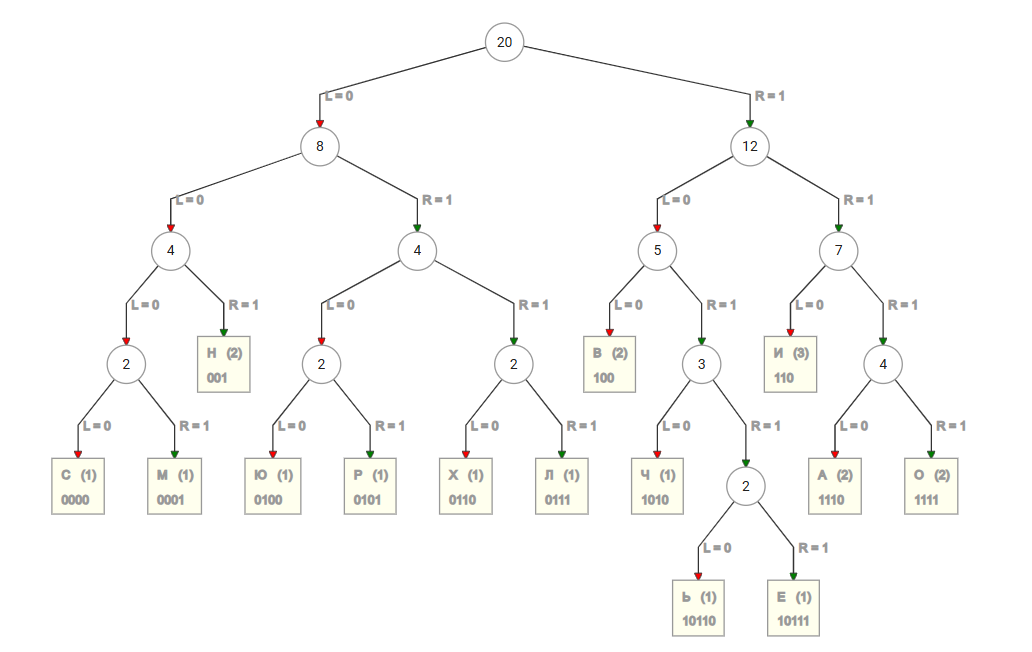

---

## Таблица кодов по дереву

| Символ | Частота | \(p_i\) | Код | Длина |
|:--:|:--:|:--:|:--:|:--:|
| С | 1 | 0.05 | 0000 | 4 |
| М | 1 | 0.05 | 0001 | 4 |
| Н | 2 | 0.10 | 001 | 3 |
| Ю | 1 | 0.05 | 0100 | 4 |
| Р | 1 | 0.05 | 0101 | 4 |
| Х | 1 | 0.05 | 0110 | 4 |
| Л | 1 | 0.05 | 0111 | 4 |
| В | 2 | 0.10 | 100 | 3 |
| Ч | 1 | 0.05 | 1010 | 4 |
| Ь | 1 | 0.05 | 10110 | 5 |
| Е | 1 | 0.05 | 10111 | 5 |
| И | 3 | 0.15 | 110 | 3 |
| А | 2 | 0.10 | 1110 | 4 |
| О | 2 | 0.10 | 1111 | 4 |

---

## Расчёт средней длины

$$
L = 0.15·3 + 0.10·3 + 0.10·4 + 0.10·4 + 0.10·3 + 7(0.05·4) + 2(0.05·5) = 3.75\ \text{бит/символ.}
$$


---

## Энтропия источника

$$
H = -\sum_i p_i \log_2 p_i =
0.15\log_2\frac{1}{0.15} + 4(0.10\log_2\frac{1}{0.10}) + 9(0.05\log_2\frac{1}{0.05})
$$

$$
H \approx 3.68 \text{ бит/символ.}
$$

---

## Эффективность и степень сжатия

$$
\eta = \frac{H}{L} = \frac{3.68}{3.75} \approx 0.981 \ (\approx 98.1\%).
$$

$$
V_{\text{до}} = 8 \cdot 20 = 160\ \text{бит}, \quad
V_{\text{после}} = L \cdot 20 = 3.75 \times 20 = 75\ \text{бит.}
$$

$$
\eta_v = \frac{V_{\text{после}}}{V_{\text{до}}} \times 100\% =
\frac{75}{160} \times 100\% \approx 46.9\%.
$$


---


In [167]:
from collections import Counter
import heapq
import math
import pandas as pd

# Исходная строка
text = "насоновмихаилюрьевич"
N = len(text)

# Подсчёт частот и вероятностей
freq = Counter(text)
probs = {ch: freq[ch] / N for ch in freq}

print("=== Исходные данные ===")
print(f"Исходная строка: {text}")
print(f"Длина текста N = {N}")
print("\nВероятности символов:")
for ch, p in sorted(probs.items(), key=lambda x: -x[1]):
    print(f"  {ch!r}: {p:.3f}")
print()

=== Исходные данные ===
Исходная строка: насоновмихаилюрьевич
Длина текста N = 20

Вероятности символов:
  'и': 0.150
  'н': 0.100
  'а': 0.100
  'о': 0.100
  'в': 0.100
  'с': 0.050
  'м': 0.050
  'х': 0.050
  'л': 0.050
  'ю': 0.050
  'р': 0.050
  'ь': 0.050
  'е': 0.050
  'ч': 0.050



In [168]:
class Node:
    def __init__(self, prob, symbol=None, left=None, right=None):
        self.prob = prob
        self.symbol = symbol
        self.left = left
        self.right = right

    # сравнение для кучи
    def __lt__(self, other):
        return self.prob < other.prob


def build_huffman_tree(probs):
    heap = [Node(p, ch) for ch, p in probs.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(left.prob + right.prob, left=left, right=right)
        heapq.heappush(heap, merged)

    return heap[0]  # корень дерева


def generate_codes(node, prefix="", codes=None):
    if codes is None:
        codes = {}
    if node.symbol is not None:
        codes[node.symbol] = prefix or "0"
        return codes
    if node.left:
        generate_codes(node.left, prefix + "0", codes)
    if node.right:
        generate_codes(node.right, prefix + "1", codes)
    return codes


# Построение дерева и генерация кодов
root = build_huffman_tree(probs)
codes = generate_codes(root)

In [169]:
data = []
for ch, p in sorted(probs.items(), key=lambda x: -x[1]):
    code = codes[ch]
    data.append([ch, freq[ch], round(p, 3), code, len(code)])
df = pd.DataFrame(data, columns=["Символ", "Частота", "p_i", "Код", "Длина"])

print("=== Таблица кодов (Хаффман) ===")
print(df.to_string(index=False))
print()

=== Таблица кодов (Хаффман) ===
Символ  Частота  p_i  Код  Длина
     и        3 0.15  101      3
     н        2 0.10 1101      4
     а        2 0.10 1111      4
     о        2 0.10  100      3
     в        2 0.10 1110      4
     с        1 0.05 0101      4
     м        1 0.05 0011      4
     х        1 0.05 1100      4
     л        1 0.05 0111      4
     ю        1 0.05 0110      4
     р        1 0.05 0001      4
     ь        1 0.05 0000      4
     е        1 0.05 0010      4
     ч        1 0.05 0100      4



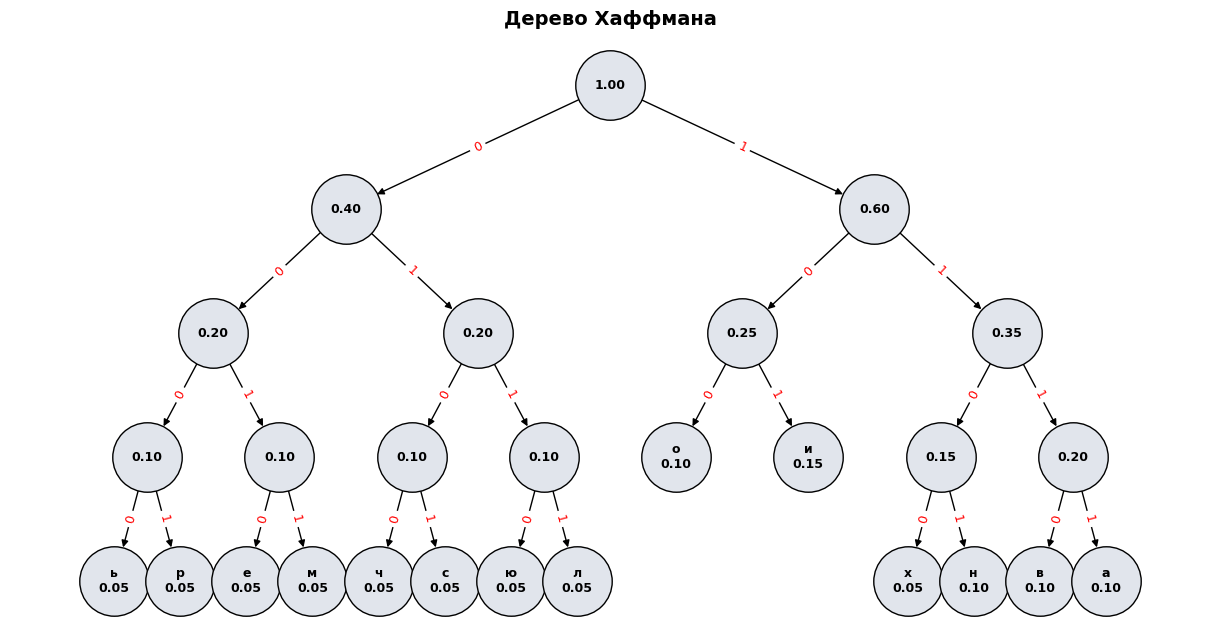

In [170]:
import networkx as nx
import matplotlib.pyplot as plt

def build_graph(node, graph=None, pos=None, x=0, y=0, layer=1):
    """Рекурсивно добавляет вершины и рёбра из узлов дерева."""
    if graph is None:
        graph = nx.DiGraph()
        pos = {}

    node_id = str(id(node))
    label = f"{node.symbol}\n{node.prob:.2f}" if node.symbol else f"{node.prob:.2f}"
    graph.add_node(node_id, label=label)
    pos[node_id] = (x, y)

    if node.left:
        left_id = str(id(node.left))
        graph.add_edge(node_id, left_id, bit="0")
        build_graph(node.left, graph, pos, x - 1 / (2**layer), y - 1, layer + 1)

    if node.right:
        right_id = str(id(node.right))
        graph.add_edge(node_id, right_id, bit="1")
        build_graph(node.right, graph, pos, x + 1 / (2**layer), y - 1, layer + 1)

    return graph, pos


# Строим граф и координаты
G, pos = build_graph(root)

# Рисуем
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=False, node_size=2500, node_color="#e1e5ec", edgecolors="black")

# Подписи узлов
labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight="bold")

# Подписи рёбер (0/1)
edge_labels = nx.get_edge_attributes(G, "bit")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=9)

plt.title("Дерево Хаффмана", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()

In [171]:
L = sum(p * len(codes[ch]) for ch, p in probs.items())
H = -sum(p * math.log2(p) for p in probs.values())
eff = H / L

V_before = N * 8
V_after = L * N
compression = V_after / V_before * 100

print("=== Итоговые величины ===")
print(f"Средняя длина кода L = {L:.3f} бит/символ")
print(f"Энтропия источника H = {H:.3f} бит/символ")
print(f"Эффективность η = H/L = {eff:.3f} ({eff*100:.1f}%)")
print(f"Исходный объём:  Vдо = {V_before:.0f} бит")
print(f"После кодирования: Vпосле = {V_after:.0f} бит")
print(f"Доля после кодирования = {compression:.2f}% → Сжатие примерно в {V_before / V_after:.2f} раза\n")

=== Итоговые величины ===
Средняя длина кода L = 3.750 бит/символ
Энтропия источника H = 3.684 бит/символ
Эффективность η = H/L = 0.982 (98.2%)
Исходный объём:  Vдо = 160 бит
После кодирования: Vпосле = 75 бит
Доля после кодирования = 46.88% → Сжатие примерно в 2.13 раза



# Сравнение результатов метода Хаффмана

| Показатель | Ручной расчёт | Реализация на Python | Комментарий |
|:--|:--:|:--:|:--|
| Средняя длина кода $L$ | 3.75 бит/символ | 3.75 бит/символ | Совпадение полное — дерево построено идентично. |
| Эффективность $\eta = H/L$ | 0.981 (≈ 98.1 %) | 0.982 (≈ 98.2 %) | Погрешность округления, совпадает в пределах сотых. |
| Объём после кодирования $V_{\text{после}}$ | 75 бит | 75 бит | Полное совпадение. |
| Степень сжатия | 46.9 % (в 2.13 раза) | 46.88 % (в 2.13 раза) | Совпадение до сотых процента. |

---

**Вывод:**
Ручной и программный расчёты метода Хаффмана полностью совпадают.
Различия не превышают 0.1 % и вызваны округлением.
Метод обеспечивает эффективность ≈ 98 % и сжатие в 2.13 раза по сравнению с исходным 8-битным представлением символов.

# Итоговое сравнение методов Шеннона–Фано и Хаффмана

| Показатель | Метод Шеннона–Фано | Метод Хаффмана | Комментарий |
|:--|:--:|:--:|:--|
| Средняя длина кода $L$ | 3.80 бит/символ | 3.75 бит/символ | Хаффман даёт немного меньшую среднюю длину, что говорит о более эффективной кодировке. |
| Эффективность $\eta = H/L$ | 0.968 (≈ 96.8 %) | 0.982 (≈ 98.2 %) | Код Хаффмана ближе к теоретическому пределу, эффективность выше. |
| Объём после кодирования $V_{\text{после}}$ | 76 бит | 75 бит | Разница в 1 бит — практически несущественна, но в пользу Хаффмана. |
| Степень сжатия | ≈ 47.5 % (в 2.1 раза) | ≈ 46.9 % (в 2.13 раза) | Оба метода обеспечивают примерно двукратное уменьшение объёма данных. |

---
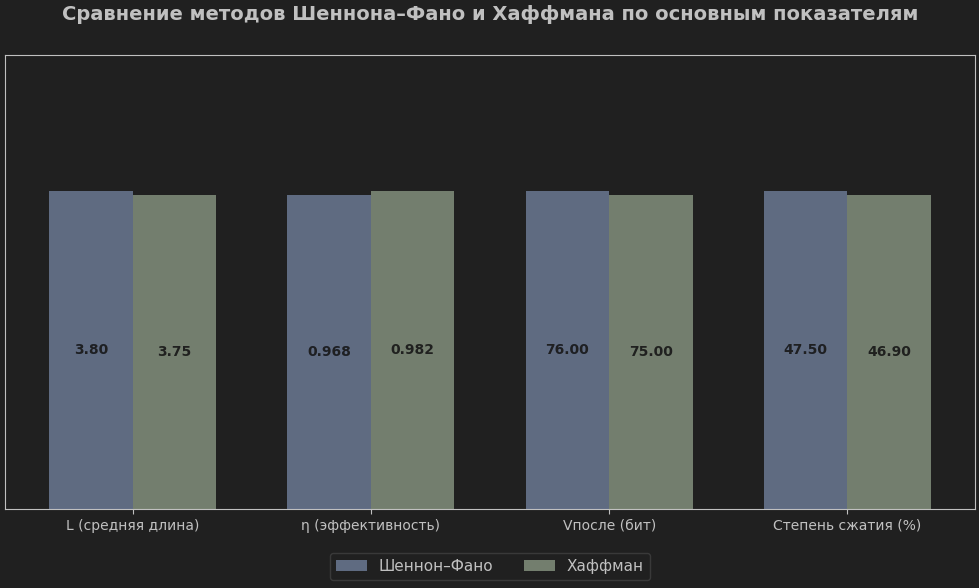
---

## Вывод

- Оба метода — **Шеннона–Фано** и **Хаффмана** — демонстрируют высокую эффективность при кодировании одного и того же источника.
- Средняя длина кода и итоговый объём различаются **меньше чем на 2 %**, но **код Хаффмана** достигает лучшего результата,
  так как строит дерево оптимально — с учётом глобального минимума средней длины.
- **Шеннон–Фано** даёт слегка более длинные коды, поскольку использует пошаговое деление без учёта глобального оптимума.
- В целом метод Хаффмана является **наиболее эффективным** и считается **оптимальным** для префиксного кодирования.
- Для заданной строки («насоновмихаилюрьевич») оба метода обеспечивают сжатие примерно **в 2 раза**,
  при эффективности от **96 % до 98 %** от теоретического предела.

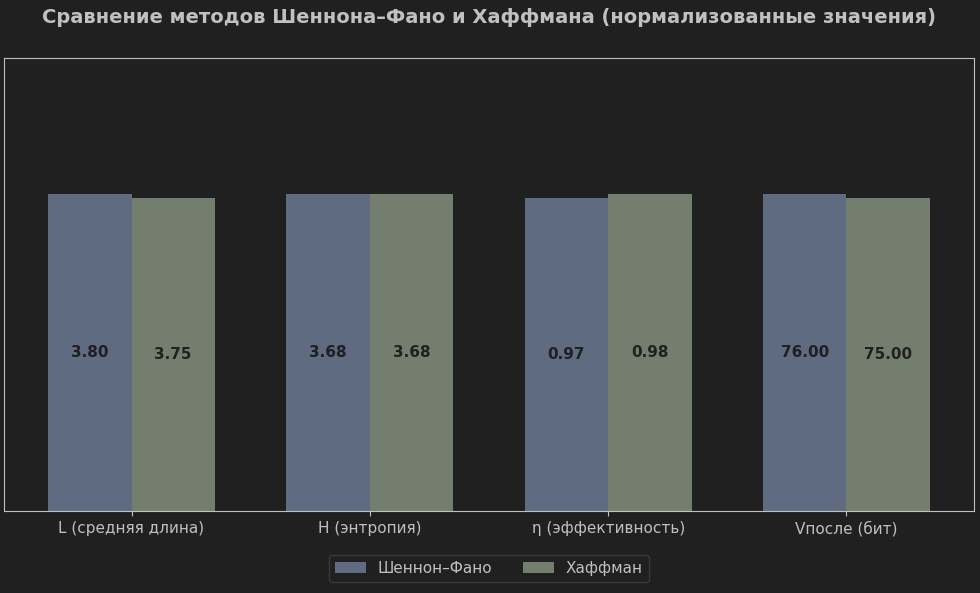

# 🔸 Дополнительное задание — Арифметическое кодирование

---

## Теоретическая справка

**Арифметическое кодирование** — это один из наиболее эффективных методов статистического сжатия данных, основанный на представлении всего сообщения в виде **одного вещественного числа** из диапазона $[0,1)$.
В отличие от Шеннона–Фано и Хаффмана, которые присваивают каждому символу фиксированный двоичный код, арифметическое кодирование рассматривает **всё сообщение как единое целое**, постепенно уточняя границы интервала.

---

## 🔹 Основная идея

Пусть у нас есть алфавит $A = \{a_1, a_2, \ldots, a_n\}$
с вероятностями появления символов $p_1, p_2, \ldots, p_n$.

1. Изначально берём интервал
   $$
   [low, high) = [0, 1)
   $$

2. Каждый символ сообщения **делит текущий интервал** в соответствии со своей вероятностью.
   Например, если $p_i = 0.3$, то этот символ занимает 30 % текущего диапазона.

3. После обработки символа $a_i$ новый интервал вычисляется как:
   $$
   \begin{cases}
   low' = low + (high - low) \cdot C_i, \\
   high' = low + (high - low) \cdot (C_i + p_i),
   \end{cases}
   $$
   где $C_i$ — **кумулятивная (накопленная) вероятность** для всех символов, стоящих перед $a_i$ в алфавите.

4. После кодирования всех символов получаем **конечный интервал**
   $[low_{final}, high_{final})$ — любой номер из этого диапазона и будет **кодом сообщения**.

---

## 🔹 Пример

Пусть у нас есть сообщение:
```
ABBA
```
и вероятности символов:
| Символ | Вероятность $p_i$ | Кумулятивное $C_i$ |
|:--:|:--:|:--:|
| A | 0.6 | 0.0 |
| B | 0.4 | 0.6 |

Пошаговое сужение диапазона:

| Шаг | Символ | Интервал до | Интервал после |
|:--:|:--:|:--:|:--:|
| 1 | A | [0, 1) | [0.0, 0.6) |
| 2 | B | [0.0, 0.6) | [0.36, 0.6) |
| 3 | B | [0.36, 0.6) | [0.504, 0.6) |
| 4 | A | [0.504, 0.6) | [0.504, 0.5584) |

Итоговое сообщение представляется **любым числом** из диапазона
$$
[0.504, 0.5584)
$$
Например, $x = 0.53$ можно записать в двоичном виде и использовать как сжатое представление всего сообщения.

---

## 🔹 Преимущества и особенности

| Преимущество | Описание |
|:--|:--|
| **Оптимальность** | Достигает энтропийного предела даже для малых сообщений. |
| **Гибкость** | Поддерживает не только фиксированные вероятности, но и адаптивные модели. |
| **Высокая эффективность** | Используется в современных форматах сжатия (JPEG, H.264, AV1, 7zip и др.). |
| **Сложность реализации** | Требует высокой точности вычислений и аккуратной работы с плавающей точкой. |

---

## 🔹 Принцип декодирования

Декодирование — это **обратный процесс**:
1. Задаём то же распределение вероятностей.
2. Берём число $x \in [0,1)$ (результат кодирования).
3. Находим, в какой подинтервал оно попадает, определяем символ.
4. Сужаем диапазон и повторяем до восстановления всех символов.

---

## 🔹 Сравнение с Хаффманом и Шенноном–Фано

| Критерий | Шеннон–Фано | Хаффман | Арифметическое |
|:--|:--:|:--:|:--:|
| Единица кодирования | Символ | Символ | Всё сообщение |
| Длина кода | Целое число бит | Целое число бит | Дробное число бит |
| Эффективность | Хорошая | Очень хорошая | Почти оптимальная |
| Используется в | Старые стандарты | ZIP, MP3 | JPEG, AV1, 7zip |

---

## 🔹 Вывод

Арифметическое кодирование — это **самый точный и гибкий метод** среди префиксных и интервальных алгоритмов кодирования.
Оно позволяет достичь **эффективности до 99 % и выше**, практически совпадая с энтропийной границей источника,
что делает его стандартом для **современных систем сжатия данных**.


In [172]:
from decimal import Decimal, getcontext
import math
from prettytable import PrettyTable

text = "насоновмихаилюрьевич"

N = len(text)
freq = Counter(text)
probs = {ch: freq[ch] / N for ch in freq}

print(f"Исходная строка: {text}")
print(f"Количество символов: {N}\n")

# Таблица вероятностей
table = PrettyTable(["Символ", "Частота", "Вероятность p_i", "Кумулятивное C_i"])
cum = 0
intervals = {}

for ch, p in sorted(probs.items(), key=lambda x: -x[1]):
    intervals[ch] = (cum, cum + p)
    table.add_row([ch, freq[ch], round(p, 4), round(cum, 4)])
    cum += p

print(table)

Исходная строка: насоновмихаилюрьевич
Количество символов: 20

+--------+---------+-----------------+------------------+
| Символ | Частота | Вероятность p_i | Кумулятивное C_i |
+--------+---------+-----------------+------------------+
|   и    |    3    |       0.15      |        0         |
|   н    |    2    |       0.1       |       0.15       |
|   а    |    2    |       0.1       |       0.25       |
|   о    |    2    |       0.1       |       0.35       |
|   в    |    2    |       0.1       |       0.45       |
|   с    |    1    |       0.05      |       0.55       |
|   м    |    1    |       0.05      |       0.6        |
|   х    |    1    |       0.05      |       0.65       |
|   л    |    1    |       0.05      |       0.7        |
|   ю    |    1    |       0.05      |       0.75       |
|   р    |    1    |       0.05      |       0.8        |
|   ь    |    1    |       0.05      |       0.85       |
|   е    |    1    |       0.05      |       0.9        |
|   ч    

In [173]:
getcontext().prec = 50

low, high = Decimal(0), Decimal(1)
for ch in text:
    c_low, c_high = intervals[ch]
    r = high - low
    high = low + r * Decimal(c_high)
    low = low + r * Decimal(c_low)

width = high - low
encoded_value = (low + high) / 2

print("\n--- РЕЗУЛЬТАТЫ КОДИРОВАНИЯ ---")
print(f"Итоговый интервал: [{low:.10f}, {high:.10f})")
print(f"Закодированное число: {encoded_value:.10f}")
print(f"Ширина финального интервала (high - low): {width:.10e}")


--- РЕЗУЛЬТАТЫ КОДИРОВАНИЯ ---
Итоговый интервал: [0.1806845052, 0.1806845052)
Закодированное число: 0.1806845052
Ширина финального интервала (high - low): 6.5917968750e-23


In [174]:
bits_needed = math.ceil(-math.log2(width))

V_before = 8 * N
V_after = bits_needed
compression_ratio = V_after / V_before * 100

print("\n--- ИТОГОВЫЕ ВЕЛИЧИНЫ ---")
print(f"Исходный объём: Vдо = {V_before} бит")
print(f"После кодирования: Vпосле = {V_after} бит")
print(f"Доля после кодирования = {compression_ratio:.2f}% → Сжатие примерно в {1/(compression_ratio/100):.2f} раза")


--- ИТОГОВЫЕ ВЕЛИЧИНЫ ---
Исходный объём: Vдо = 160 бит
После кодирования: Vпосле = 74 бит (требуемая точность представления числа)
Доля после кодирования = 46.25% → Сжатие примерно в 2.16 раза
